In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#load the dataset
df = pd.read_csv('mail_data.csv')
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [ ]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
data= df.where((pd.notnull(df)),'')

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# text vectorization
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

In [ ]:

data.loc[data['Category'] == 'spam', 'Category',]=0
data.loc[data['Category']== 'ham', 'Category',]=1

In [ ]:
print(data['Category'].unique())
print(data['Category'].dtype)


[1 0]
object


In [ ]:
X = data['Message']
Y = data['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [ ]:
#train and test
# 0.2 = 80% training 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
#text to feature vection used as input to logistic regression
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [ ]:
# Convert text to numerical features using Bag of Words (CountVectorizer)
count_vectorizer = CountVectorizer(stop_words='english')

# Fit on training data and transform both train and test
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [ ]:
#print(X_train_count)
print("Shape of count vector features:")
print("Train:", X_train_count.shape)
print("Test:", X_test_count.shape)

Shape of count vector features:
Train: (4457, 7431)
Test: (1115, 7431)


In [ ]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [ ]:
print(Y_train)

3075    1
1787    1
1614    1
4304    1
3266    0
       ..
789     0
968     1
1667    1
3321    1
1688    0
Name: Category, Length: 4457, dtype: int64


In [ ]:
#training a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_features, Y_train)



MultinomialNB()

In [ ]:
#accuracy (training data)
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('accuracy on training data ',accuracy_on_training_data)

accuracy on training data  0.9807045097599282


In [ ]:
#accuracy (testing data)
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_testing_data = accuracy_score(Y_test, prediction_on_test_data)

print("accuracy on test data: ",accuracy_on_testing_data)

accuracy on test data:  0.9730941704035875


In [ ]:
#testing on user input
user_input = input("Enter a message: ")
user_input_features = feature_extraction.transform([user_input])
prediction = model.predict(user_input_features)
if prediction[0] == 0:
    print("Spam")
else:
    print("Ham")


Enter a message: hey you have won prize of 500$
Spam


In [ ]:
cm = confusion_matrix(Y_test, prediction_on_test_data)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[125  30]
 [  0 960]]


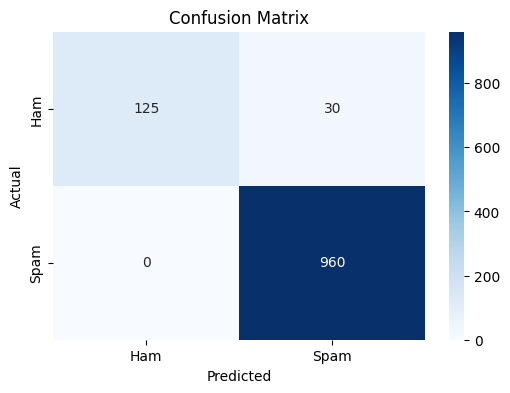

In [ ]:
cm = confusion_matrix(Y_test, prediction_on_test_data)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'spam_classifier_model.pkl')
print("✅ Model saved as 'spam_classifier_model.pkl'")

# Save the TF-IDF vectorizer
joblib.dump(feature_extraction, 'tfidf_vectorizer.pkl')
print("✅ Vectorizer saved as 'tfidf_vectorizer.pkl'")

# Verify files are saved
import os
if os.path.exists('spam_classifier_model.pkl'):
    size = os.path.getsize('spam_classifier_model.pkl') / 1024  # KB
    print(f"📦 Model file size: {size:.2f} KB")

if os.path.exists('tfidf_vectorizer.pkl'):
    size = os.path.getsize('tfidf_vectorizer.pkl') / 1024  # KB
    print(f"📦 Vectorizer file size: {size:.2f} KB")

print("\n✅ Both files saved successfully!")

✅ Model saved as 'spam_classifier_model.pkl'
✅ Vectorizer saved as 'tfidf_vectorizer.pkl'
📦 Model file size: 232.99 KB
📦 Vectorizer file size: 146.86 KB

✅ Both files saved successfully!
